

# Project: No-show appointments Dataset
## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#import">Importing Libraries</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction


>In this project, I'll use a dataset called " No-show appointment dataset" downloaded from kaggle, This dataset is collecting information from over 100K medical appointments in Brazil and is focused on the question of whether or not patients show up for their appointment. A number of characteristics about the patient are included in each row such as "PatientId", "AppointmentID', "Gender", "No-show"...etc.

> <h3> My question to answer is : " Is there are likelihood factors leading patients to do not show up for their appointments?</h3>

> I'll investigate if the gender, appointment day, age, hospital location, education and health are a determinant factors of a likelihood "No-Show".
 
> <h4 style="color:red"> Note: For the No-show column, if it says 'Yes' that means the patient didn't show up for her appointment.</h4> 


<a id='import'></a>
## Importing libraries necessary for this project

In [1]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
import matplotlib.pyplot as plt
from matplotlib.pyplot import rcParams 
from IPython.display import display
import seaborn as sns
sns.set_style('darkgrid')

% matplotlib inline



<a id='wrangling'></a>
## Data Wrangling

> In this section, I'll import the dataset and check the data quality
### Importing DataSet

In [2]:
df = pd.read_csv('noshowappointments-kagglev2-may-2016.csv')


<h4>Read the first 5 rows of the dataset</h4>

In [3]:
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


### Data Cleaning

<h4> Renaming Columns heading </h4>

In [4]:
df.rename(columns = {'Hipertension': 'Hypertension',
                'Handcap': 'Handicap','No-show':'No_show'}, inplace = True)

print (df.columns)

Index(['PatientId', 'AppointmentID', 'Gender', 'ScheduledDay',
       'AppointmentDay', 'Age', 'Neighbourhood', 'Scholarship', 'Hypertension',
       'Diabetes', 'Alcoholism', 'Handicap', 'SMS_received', 'No_show'],
      dtype='object')


<h4>Knowing my dataset values </h4>

In [5]:
print("Age:",sorted(df.Age.unique()))
print("Gender:",df.Gender.unique())
print("Diabetes:",df.Diabetes.unique())
print("Alcoholism:",df.Alcoholism.unique())
print("Hypertension:",df.Hypertension.unique())
print("Handicap:",df.Handicap.unique())
print("Scholarship:",df.Scholarship.unique())
print("SMS_received:",df.SMS_received.unique())
print('No_show:',df.No_show.unique())

Age: [-1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 102, 115]
Gender: ['F' 'M']
Diabetes: [0 1]
Alcoholism: [0 1]
Hypertension: [1 0]
Handicap: [0 1 2 3 4]
Scholarship: [0 1]
SMS_received: [0 1]
No_show: ['No' 'Yes']


The dataset values looks normal except for one value in the age "-1" which is a "fetus". I'll drop it from the dataset next.

<h4> Add Week Day </h>

In [6]:
df['DayOfWeek'] = pd.to_datetime(df['AppointmentDay']).apply(lambda x: x.isoweekday())




In [7]:
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No_show,DayOfWeek
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No,5
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No,5
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No,5
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,5
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No,5


In [8]:
print('DayOfWeek:',sorted(df.DayOfWeek.unique()))

DayOfWeek: [1, 2, 3, 4, 5, 6]


In [9]:
df.AppointmentDay = df.AppointmentDay.apply(np.datetime64)
df.ScheduledDay   = df.ScheduledDay.apply(np.datetime64)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 15 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null datetime64[ns]
AppointmentDay    110527 non-null datetime64[ns]
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hypertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handicap          110527 non-null int64
SMS_received      110527 non-null int64
No_show           110527 non-null object
DayOfWeek         110527 non-null int64
dtypes: datetime64[ns](2), float64(1), int64(9), object(3)
memory usage: 12.6+ MB


<h4>Remove Age outliers</h4>

In [11]:
df = df[(df.Age >= 0) & (df.Age <= 100)]


<h4> Verifying the size of our DataSet </h4>

In [12]:
df.shape

(110519, 15)

<h4>Creating the age-bins</h4>

In [13]:

bins = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
df['Agebins'] = pd.cut(df['Age'], bins)
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No_show,DayOfWeek,Agebins
0,2.987250e+13,5642903,F,2016-04-29 18:38:08,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No,5,"(60, 70]"
1,5.589978e+14,5642503,M,2016-04-29 16:08:27,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No,5,"(50, 60]"
2,4.262962e+12,5642549,F,2016-04-29 16:19:04,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No,5,"(60, 70]"
3,8.679512e+11,5642828,F,2016-04-29 17:29:31,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,5,"(0, 10]"
4,8.841186e+12,5642494,F,2016-04-29 16:07:23,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No,5,"(50, 60]"


<h4>Looking for missing value</h4>

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110519 entries, 0 to 110526
Data columns (total 16 columns):
PatientId         110519 non-null float64
AppointmentID     110519 non-null int64
Gender            110519 non-null object
ScheduledDay      110519 non-null datetime64[ns]
AppointmentDay    110519 non-null datetime64[ns]
Age               110519 non-null int64
Neighbourhood     110519 non-null object
Scholarship       110519 non-null int64
Hypertension      110519 non-null int64
Diabetes          110519 non-null int64
Alcoholism        110519 non-null int64
Handicap          110519 non-null int64
SMS_received      110519 non-null int64
No_show           110519 non-null object
DayOfWeek         110519 non-null int64
Agebins           106980 non-null category
dtypes: category(1), datetime64[ns](2), float64(1), int64(9), object(3)
memory usage: 13.6+ MB


Since the total number of each serie is equal to the total number of the rows, and none of them are non-null.

<h4> Looking for duplicates </h4>

In [15]:
df['is_duplicated'] = df.duplicated(['PatientId', 'AppointmentDay'])

In [16]:
df['is_duplicated'].sum()

8718

A patient shouldn't have more than one appointment in the same day. So from the above result we see that we have 8719 duplicates appointment. 

<h4> Creating a new dataframe with no duplicated appointment </h>

In [17]:
df_nodup = df.loc[df['is_duplicated'] == False]

In [18]:
df_nodup['is_duplicated'].sum()

0

In [19]:
df_nodup.shape

(101801, 17)

In [20]:
df_nodup.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No_show,DayOfWeek,Agebins,is_duplicated
0,2.987250e+13,5642903,F,2016-04-29 18:38:08,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No,5,"(60, 70]",False
1,5.589978e+14,5642503,M,2016-04-29 16:08:27,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No,5,"(50, 60]",False
2,4.262962e+12,5642549,F,2016-04-29 16:19:04,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No,5,"(60, 70]",False
3,8.679512e+11,5642828,F,2016-04-29 17:29:31,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,5,"(0, 10]",False
4,8.841186e+12,5642494,F,2016-04-29 16:07:23,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No,5,"(50, 60]",False


<h4> Looking for missing values </h4>

In [21]:
df_nodup.isnull().sum()


PatientId            0
AppointmentID        0
Gender               0
ScheduledDay         0
AppointmentDay       0
Age                  0
Neighbourhood        0
Scholarship          0
Hypertension         0
Diabetes             0
Alcoholism           0
Handicap             0
SMS_received         0
No_show              0
DayOfWeek            0
Agebins           3352
is_duplicated        0
dtype: int64

The result shows there is no missing value in the dataset

In [22]:
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No_show,DayOfWeek,Agebins,is_duplicated
0,2.987250e+13,5642903,F,2016-04-29 18:38:08,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No,5,"(60, 70]",False
1,5.589978e+14,5642503,M,2016-04-29 16:08:27,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No,5,"(50, 60]",False
2,4.262962e+12,5642549,F,2016-04-29 16:19:04,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No,5,"(60, 70]",False
3,8.679512e+11,5642828,F,2016-04-29 17:29:31,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,5,"(0, 10]",False
4,8.841186e+12,5642494,F,2016-04-29 16:07:23,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No,5,"(50, 60]",False


In [23]:
df_noshow = df_nodup.loc[df['No_show'] == "Yes"]
df_noshow.shape

(20422, 17)

In [24]:
df_show = df_nodup.loc[df['No_show'] == "No"]
df_show.shape


(81379, 17)

In [25]:
df_noshow.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No_show,DayOfWeek,Agebins,is_duplicated
6,7.336882e+14,5630279,F,2016-04-27 15:05:12,2016-04-29,23,GOIABEIRAS,0,0,0,0,0,0,Yes,5,"(20, 30]",False
7,3.449833e+12,5630575,F,2016-04-27 15:39:58,2016-04-29,39,GOIABEIRAS,0,0,0,0,0,0,Yes,5,"(30, 40]",False
11,7.542951e+12,5620163,M,2016-04-26 08:44:12,2016-04-29,29,NOVA PALESTINA,0,0,0,0,0,1,Yes,5,"(20, 30]",False
17,1.479497e+13,5633460,F,2016-04-28 09:28:57,2016-04-29,40,CONQUISTA,1,0,0,0,0,0,Yes,5,"(30, 40]",False
20,6.222575e+14,5626083,F,2016-04-27 07:51:14,2016-04-29,30,NOVA PALESTINA,0,0,0,0,0,0,Yes,5,"(20, 30]",False


In [26]:
df_show.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No_show,DayOfWeek,Agebins,is_duplicated
0,2.987250e+13,5642903,F,2016-04-29 18:38:08,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No,5,"(60, 70]",False
1,5.589978e+14,5642503,M,2016-04-29 16:08:27,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No,5,"(50, 60]",False
2,4.262962e+12,5642549,F,2016-04-29 16:19:04,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No,5,"(60, 70]",False
3,8.679512e+11,5642828,F,2016-04-29 17:29:31,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,5,"(0, 10]",False
4,8.841186e+12,5642494,F,2016-04-29 16:07:23,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No,5,"(50, 60]",False


<h4> Converting No-show columns </h4>
> I'll convert the 1's to "Yes" and 0's to "No". Also the day numbers to day name


In [27]:
df_noshow['Scholarship'].replace({0:'No',1:'Yes'},inplace=True)
df_noshow['Hypertension'].replace({0:'No',1:'Yes'},inplace=True)
df_noshow['Diabetes'].replace({0:'No',1:'Yes'},inplace=True)
df_noshow['Alcoholism'].replace({0:'No',1:'Yes'},inplace=True)
df_noshow['Handicap'].replace({0:'No',1:'low', 2:'Moderate', 3:'High', 4:'Very_High'},inplace=True)
df_noshow['SMS_received'].replace({0:'No',1:'Yes'},inplace=True)
df_noshow['DayOfWeek'].replace({1:'Mon', 2:'Tue', 3:'Wed', 4:'Thu', 5:'Fri',6:'Sat', 0:'Sun'},inplace=True)

df_noshow.head()

C:\Users\Hamajid\Anaconda3\lib\site-packages\pandas\core\generic.py:3924: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No_show,DayOfWeek,Agebins,is_duplicated
6,7.336882e+14,5630279,F,2016-04-27 15:05:12,2016-04-29,23,GOIABEIRAS,No,No,No,No,No,No,Yes,Fri,"(20, 30]",False
7,3.449833e+12,5630575,F,2016-04-27 15:39:58,2016-04-29,39,GOIABEIRAS,No,No,No,No,No,No,Yes,Fri,"(30, 40]",False
11,7.542951e+12,5620163,M,2016-04-26 08:44:12,2016-04-29,29,NOVA PALESTINA,No,No,No,No,No,Yes,Yes,Fri,"(20, 30]",False
17,1.479497e+13,5633460,F,2016-04-28 09:28:57,2016-04-29,40,CONQUISTA,Yes,No,No,No,No,No,Yes,Fri,"(30, 40]",False
20,6.222575e+14,5626083,F,2016-04-27 07:51:14,2016-04-29,30,NOVA PALESTINA,No,No,No,No,No,No,Yes,Fri,"(20, 30]",False


As a conclusion, we had 110527 rows, after removing outliers (1) and duplicates (8719) we ended by 110807 non duplicated appointments in which we have 20424 no_show appointment.

<a id='eda'></a>
## Exploratory Data Analysis

> Using the modified data sets from above, we will start exploring our data


### Show vs No_show 


<h4> Total of Show and No-Show</h4>

> I'll calculate the percentage of the no-show versus show for the data set. If it's less than 10% it may be considered as normal rate for the business but if it's higher than that, I'll explore the data to identify the influencing factors

In [28]:
total = len(df_nodup.index)
print('total of appointment is:', total)
nstotal = (df_nodup['No_show'] == 'Yes').sum().astype(float)
print('total of No Show :', nstotal)
prct = round(float((nstotal/total)*100),2)
print ("The percenatge of no show is : %0.2f "%(prct),"%")


total of appointment is: 101801
total of No Show : 20422.0
The percenatge of no show is : 20.06  %


In [29]:
columns = ['No_show']
for s in columns :
    print(df_nodup.groupby(s)['No_show'].count())

No_show
No     81379
Yes    20422
Name: No_show, dtype: int64


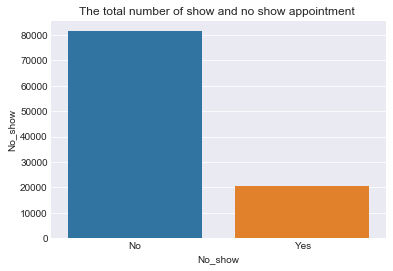

In [30]:
ax=sns.countplot(x='No_show', data=df_nodup)
ax.set(ylabel='No_show')
ax.set_title('The total number of show and no show appointment ');

From the above data. The total of non-duplicate appointment is: 101807, where 20404 times the patients didn't show to their appointment which is a little over 20%. I'll explore the dataset deeper to identify what factors are leading patients to do not show up for their appointment

## Exploring No_Show Dataframe

In [31]:
# Defining a function to calculate the percentages

def percentage_calc(column_name, value, specific_text):
    total = len(df_noshow.index)
    nstotal = (df_noshow[column_name] == value).sum()
    pct = round(float((nstotal/total)*100),2)
    text = " This is " + str(pct) + "% of " + str(total) + " records."
    print(str(nstotal) + ' ' + specific_text + text)
    


<h4> 1- No Show by Gender </h4>

> In this section, I'll explore the influence of the gender on the no show percentage.

In [32]:
percentage_calc( "Gender", "M", "of the no show appointments are for men.")

6970 of the no show appointments are for men. This is 34.13% of 20422 records.


In [33]:
percentage_calc( "Gender", "F", "of the appointments is for women.")

13452 of the appointments is for women. This is 65.87% of 20422 records.


In [34]:
columns = ['Gender']
for g in columns :
    print(df_noshow.groupby(g)['No_show'].count())

Gender
F    13452
M     6970
Name: No_show, dtype: int64


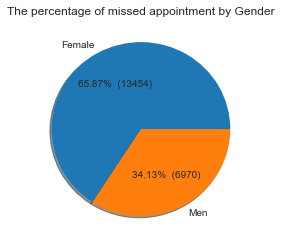

In [35]:
plt.figure(figsize=plt.figaspect(1))
values = [13454, 6970] 
labels = ['Female', 'Men'] 


def make_autopct(values):
    def my_autopct(pct):
        total = sum(values)
        val = int(round(pct*total/100.0))
        return '{p:.2f}%  ({v:d})'.format(p=pct,v=val)
    return my_autopct
plt.title('The percentage of missed appointment by Gender')

plt.pie(values, labels=labels, autopct=make_autopct(values), shadow=True)
plt.show()


The Pie chart above shows that the Female patients are missing their doctor visits more often.Women missed doctor visit 2 times more then men (66% vs 34%), apparently gender is an important influencing factor on the no show dataset.

<h4> 2- No show by Scholarship </h4>
 

> In this part,I'll analysis the effect of the scholarship the no show rate, to see if patient with scholarship are attending their doctor visit more then patients without scholarship and vis versa

In [36]:
percentage_calc( "Scholarship", "Yes", "of the no show appointments are for patient with scholarship.")

2343 of the no show appointments are for patient with scholarship. This is 11.47% of 20422 records.


In [37]:
percentage_calc( "Scholarship", "No", "of the no show appointments are for patient with scholarship.")

18079 of the no show appointments are for patient with scholarship. This is 88.53% of 20422 records.


In [38]:
columns = ['Scholarship']
for e in columns :
    print(df_noshow.groupby(e)['No_show'].count())

Scholarship
No     18079
Yes     2343
Name: No_show, dtype: int64


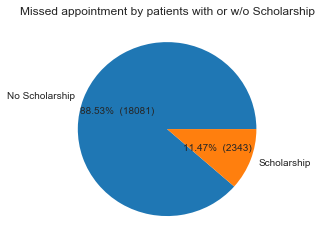

In [39]:
plt.figure(figsize=plt.figaspect(1))
values = [18081, 2343] 
labels = ['No Scholarship', 'Scholarship'] 

def make_autopct(values):
    def my_autopct(pct):
        total = sum(values)
        val = int(round(pct*total/100.0))
        return '{p:.2f}%  ({v:d})'.format(p=pct,v=val)
    return my_autopct
plt.title('Missed appointment by patients with or w/o Scholarship')

plt.pie(values, labels=labels, autopct=make_autopct(values))
plt.show()

Only 11.47% of the patients with scholarship missed their appointment, and by assuming having scholarship meaning educated. I might conclude that educated people don't miss their appointment often. So the scholarship is influencing the no show rate

<h4> 3- No show for patients with Health issues </h4>

> Base on our dataset, I'll focus my analysis in this section around the health condition of the patient and it's influence on the no-show rate 

- Hypertension : <br>
> Is patients with the hypertension issues are missing their appointments more than regular patients, In other words, is the hypertension disease an influencing the no show rate?

In [40]:
percentage_calc( "Hypertension", "Yes", "of the no show appointments are from patients that have Hypertension.")

3452 of the no show appointments are from patients that have Hypertension. This is 16.9% of 20422 records.


In [41]:
percentage_calc( "Hypertension", "No", "of the no show appointments are from patients whom doesn't have Hypertension.")

16970 of the no show appointments are from patients whom doesn't have Hypertension. This is 83.1% of 20422 records.


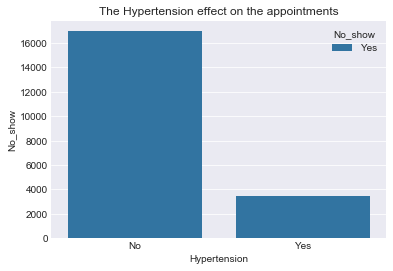

In [42]:
plt.title('The Hypertension effect on the appointments')
ax=sns.countplot(x='Hypertension', data=df_noshow , hue='No_show')
ax.set(ylabel='No_show');

Only 17% of patients with hypertension issue missed their appointment, so the hypertension does not have a big effect on the no show rate

- Diabetics : <br>
> Are the diabetic patients missing their appointment more than the patients with no diabetic issues?

In [43]:
percentage_calc( "Diabetes", "Yes", "of the no show appointments are from patients are Diabetics.")

1310 of the no show appointments are from patients are Diabetics. This is 6.41% of 20422 records.


In [44]:
percentage_calc( "Diabetes", "No", "of the no show appointments are from patients are Diabetics.")

19112 of the no show appointments are from patients are Diabetics. This is 93.59% of 20422 records.


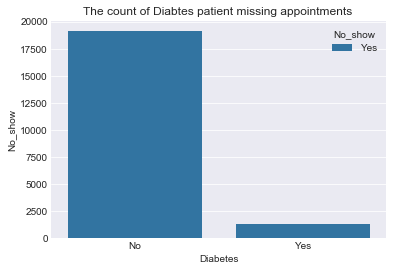

In [45]:
plt.title('The count of Diabtes patient missing appointments ')
ax=sns.countplot(x='Diabetes', data=df_noshow , hue='No_show')
ax.set(ylabel='No_show');

We may conclude that diabetic patients missed less of their appointment then non diabetics. So been diabitic doesn't influence the no-show rate

- No show for alcoholic’s patient: <br>
>Does alcoholism affect the no show rate?

In [46]:
percentage_calc( "Alcoholism", "Yes", "of the no show appointments are from patients whom are Alcoholics.")

605 of the no show appointments are from patients whom are Alcoholics. This is 2.96% of 20422 records.


In [47]:
percentage_calc( "Alcoholism", "No", "of the no show appointments are from patients whom are not Alcoholics.")

19817 of the no show appointments are from patients whom are not Alcoholics. This is 97.04% of 20422 records.


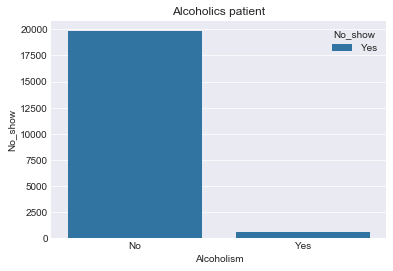

In [48]:
plt.title('Alcoholics patient')
ax=sns.countplot(x='Alcoholism', data=df_noshow , hue='No_show')
ax.set(ylabel='No_show');

Patients with alcohol issue are not missing their appointment as much as regular patients. So their is not real effect of the alcoholism on the no-show rate

- No show for patients with different levels of handicap : <br>
> Which handicap level is influencing the no show rate ?

In [49]:
percentage_calc( "Handicap", "No", "of the no show appointments are from patients whom are not handicap.")

20076 of the no show appointments are from patients whom are not handicap. This is 98.31% of 20422 records.


In [50]:
percentage_calc( "Handicap", "low", "of the no show appointments are from a low handicap patients.")

309 of the no show appointments are from a low handicap patients. This is 1.51% of 20422 records.


In [51]:
percentage_calc( "Handicap", "Moderate", "of the no show appointments are from a moderate handicap patients.")

33 of the no show appointments are from a moderate handicap patients. This is 0.16% of 20422 records.


In [52]:
percentage_calc( "Handicap", "High", "of the no show appointments are from a high handicap patients.")

3 of the no show appointments are from a high handicap patients. This is 0.01% of 20422 records.


In [53]:
percentage_calc( "Handicap", "Very_High", "of the no show appointments are from a very high handicap patients.")

1 of the no show appointments are from a very high handicap patients. This is 0.0% of 20422 records.


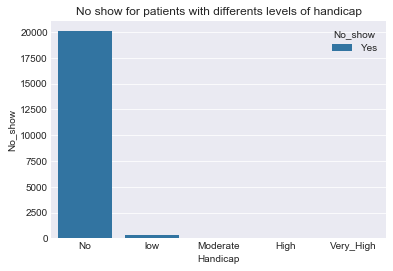

In [54]:
plt.title('No show for patients with differents levels of handicap')
ax=sns.countplot(x='Handicap', data=df_noshow , hue='No_show')
ax.set(ylabel='No_show');

Handicap wasn't a determinant factor for the no show rate, as we see on the plot patient with no handicap has the highest rate among patient with different levels of handicap

<h4> 4- No show for patients who received SMS </h4>

> Is sending SMS reminder to Patient will decrease the no show rate?

In [55]:
percentage_calc( "SMS_received", "Yes", "of the no show appointments are from patients who received text message reminder.")

9349 of the no show appointments are from patients who received text message reminder. This is 45.78% of 20422 records.


In [56]:
percentage_calc( "SMS_received", "No", "of the no show appointments are from patients who didn't receive text message reminder.")

11073 of the no show appointments are from patients who didn't receive text message reminder. This is 54.22% of 20422 records.


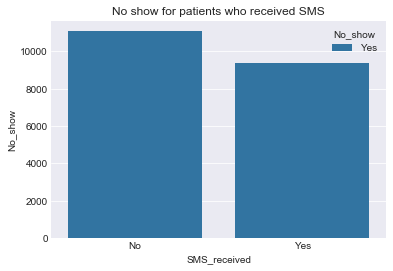

In [57]:
plt.title('No show for patients who received SMS')


ax=sns.countplot(x='SMS_received', data=df_noshow , hue='No_show')
ax.set(ylabel='No_show');


Sending reminder via sms didn't help much to decrease the no show rate

<h4> 5- No show by patient age bins </h4>

> Does age affect the no show rate?

Text(0.5,1,'No_show by Age Bins')

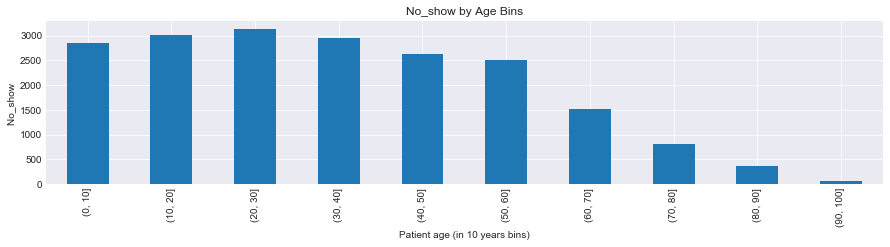

In [58]:
df_age = df_noshow.groupby('Agebins').count()

ax = df_age['No_show'].plot(kind='bar', figsize=(15, 3))
ax.set_ylabel('No_show ')
ax.set_xlabel('Patient age (in 10 years bins)')
plt.title('No_show by Age Bins')

From the above graph, we can see that younger patients are missing their appointment more frequently than older patient .

<a id='conclusions'></a>
## Conclusions

As a Conclusion, and base on the available data.

- A correlation between age groups and missing appointments. It appear young people are more likely to miss appointments.
- Female are more likely tend to miss appointments then men. 
- Patients with scholarships appeared to have a higher percentage of attending appointments.
- SMS reminder didn't increase show ups. <br>


This dataset has limitations, Age under 0 and above 100 years old were removed which may influence the analysis also the handicap level is unclear and we can't make prediction base on a number without knowing the nature of the handicap.The selection of the neighberhood on this sample wasn't very well defined for us, so we can't know if the data is biased or unbiased. <br>

For further studies it would be interesting to know the income level, the patient occupation and education level, and the average travel time between the patient location and the clinic.


